In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier 
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix


from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [4]:
xtrain = pd.read_parquet("../data/xtrain.parquet")
ytrain = pd.read_parquet("../data/ytrain.parquet")
xtest = pd.read_parquet("../data/xtest.parquet")
ytest = pd.read_parquet("../data/ytest.parquet")

In [5]:
test = pd.concat([xtest, ytest], axis=1)
# Generar columna predicción
prob_0 = ytest.value_counts()[0]/ ytest.value_counts().sum()
test['ypred'] = np.random.choice(2,len(test), p=[prob_0, 1-prob_0])
# Predeciremos que el valor que toma la variable 
# objetivo es siempre 0, ya que acertaremos más de un 
# 98% de las veces.


In [6]:
print("Classification Report")
print(classification_report(test['fatality'], test['ypred']))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    997197
           1       0.01      0.01      0.01     15456

    accuracy                           0.97   1012653
   macro avg       0.50      0.50      0.50   1012653
weighted avg       0.97      0.97      0.97   1012653



In [7]:
np.random.choice(np.arange(0,2), p=[0.5, 1-0.5])

1

In [8]:
recall_score(test['fatality'], test['ypred'])

0.014233954451345756

In [9]:
precision_score(test['fatality'], test['ypred'])

0.014089919303189445

In [10]:
accuracy_score(test['fatality'], test['ypred'])

0.9697527188484111

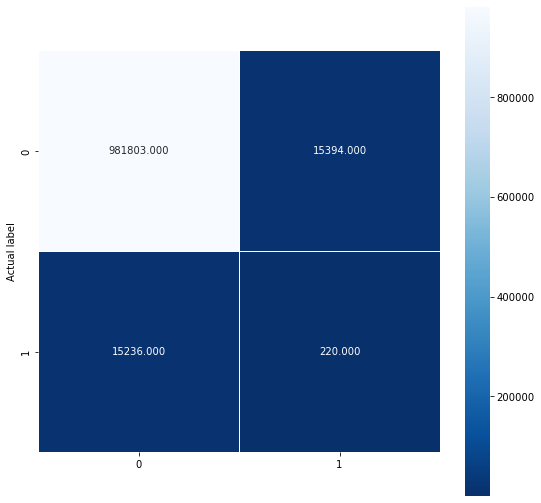

In [11]:
cm_gbt = confusion_matrix(test['fatality'], test['ypred'])

plt.figure(figsize=(9,9))
sns.heatmap(cm_gbt, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');

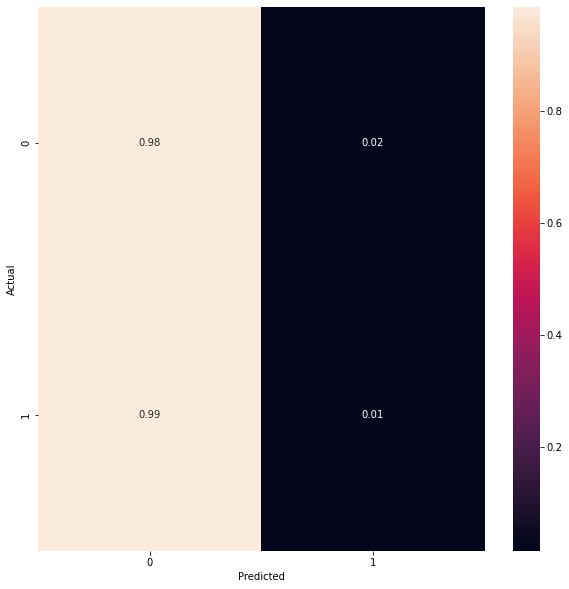

In [12]:
cm = confusion_matrix(test['fatality'], test['ypred'])
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

# Base Model 2


In [13]:
def evaluate_model(ytest, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(ytest, ypred_proba[:, 1])))
    print('Accuracy of the model: {}\n'.format(accuracy_score(ytest, ypred)))
    print('Classification report: \n{}\n'.format(classification_report(ytest, ypred)))
    print('Confusion matrix: \n{}\n'.format(confusion_matrix(ytest, ypred)))

In [14]:
modelo_base = DummyClassifier(strategy='stratified', random_state=0)
modelo_base.fit(xtrain, ytrain)
ypred =modelo_base.predict(xtest)
ypred_proba = modelo_base.predict_proba(xtest)

In [15]:
evaluate_model(ytest,ypred,ypred_proba)

ROC-AUC score of the model: 0.49958685184478924
Accuracy of the model: 0.9702494339127026

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    997197
           1       0.01      0.01      0.01     15456

    accuracy                           0.97   1012653
   macro avg       0.50      0.50      0.50   1012653
weighted avg       0.97      0.97      0.97   1012653


Confusion matrix: 
[[982308  14889]
 [ 15238    218]]



C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


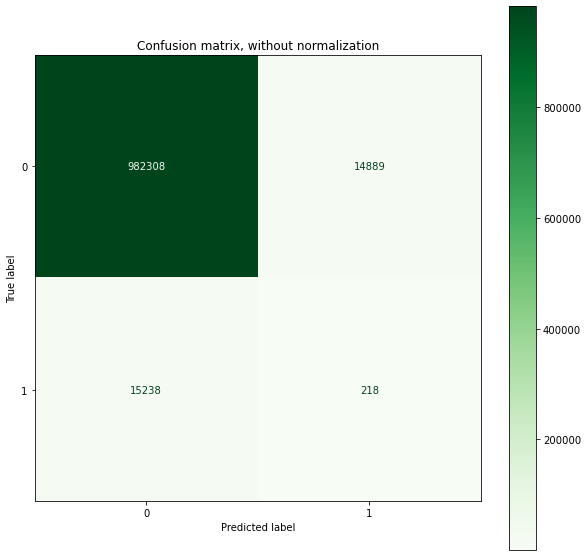

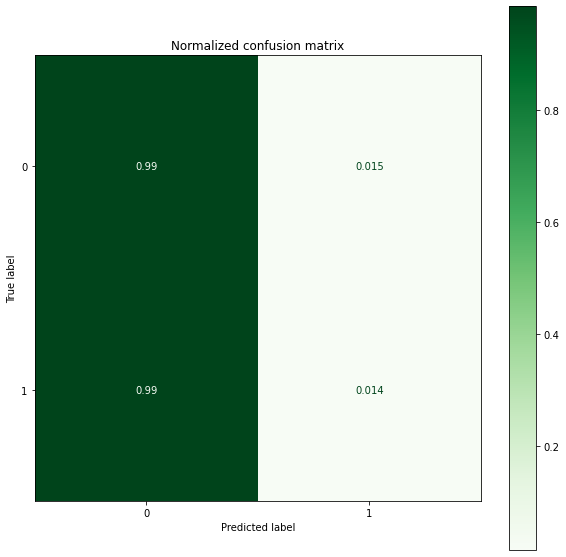

In [16]:

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = plot_confusion_matrix(modelo_base, xtest, ytest,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize,
                                 ax=ax)
    disp.ax_.set_title(title)


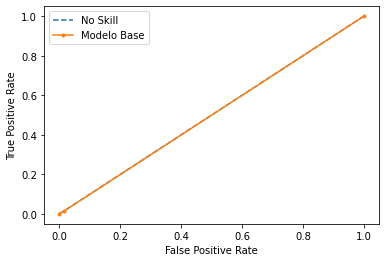

In [17]:
# keep probabilities for the positive outcome only
yhat = ypred_proba[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(ytest, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Modelo Base')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

# Naive Bayes

In [18]:
naive_bayes = GaussianNB()
naive_bayes = naive_bayes.fit(xtrain, ytrain)
ypred = naive_bayes.predict(xtest)
ypred_proba = naive_bayes.predict_proba(xtest)

C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
evaluate_model(ytest,ypred,ypred_proba)

ROC-AUC score of the model: 0.7861758810670949
Accuracy of the model: 0.8619517248257794

Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.87      0.93    997197
           1       0.06      0.54      0.11     15456

    accuracy                           0.86   1012653
   macro avg       0.53      0.70      0.52   1012653
weighted avg       0.98      0.86      0.91   1012653


Confusion matrix: 
[[864470 132727]
 [  7068   8388]]



C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Usuario\anaconda3\envs\core_models\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


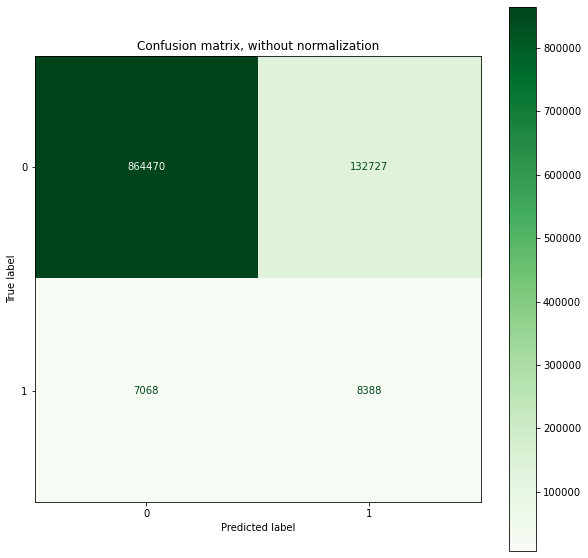

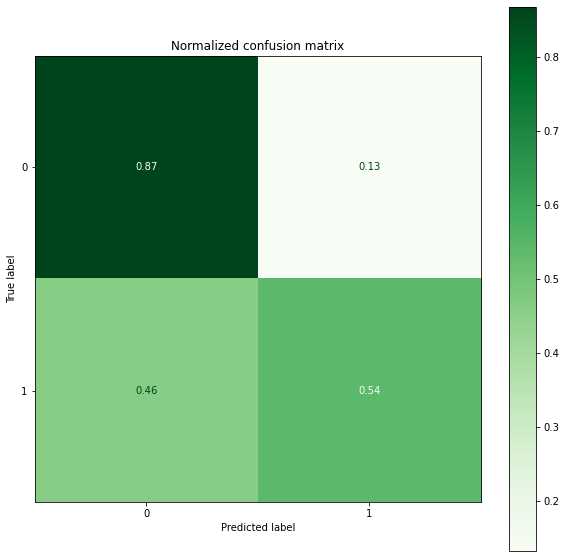

In [20]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = plot_confusion_matrix(naive_bayes, xtest, ytest,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize,
                                 ax=ax)
    disp.ax_.set_title(title)

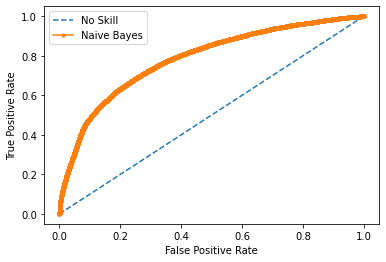

In [21]:
# keep probabilities for the positive outcome only
yhat = ypred_proba[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(ytest, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Naive Bayes')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [22]:
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.024122, G-Mean=0.717


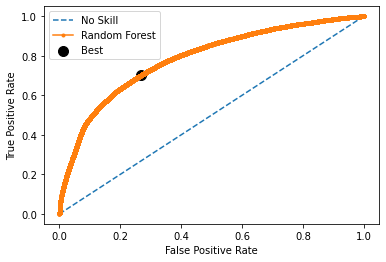

In [23]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

### Jugar con threshold

In [24]:
ypred_new_threshold = (ypred_proba[:,1]>=0.003422).astype(int)
ypred_new_threshold

array([1, 0, 1, ..., 0, 1, 1])

In [25]:
evaluate_model(ytest,ypred_new_threshold,ypred_proba)

ROC-AUC score of the model: 0.7861758810670949
Accuracy of the model: 0.5572283891915591

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.55      0.71    997197
           1       0.03      0.83      0.05     15456

    accuracy                           0.56   1012653
   macro avg       0.51      0.69      0.38   1012653
weighted avg       0.98      0.56      0.70   1012653


Confusion matrix: 
[[551469 445728]
 [  2646  12810]]



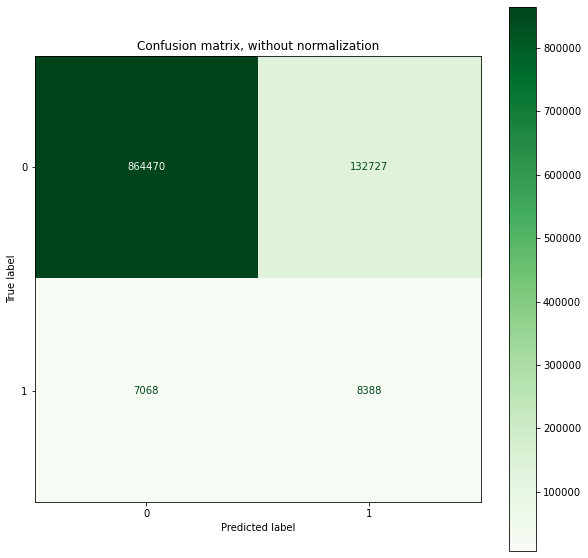

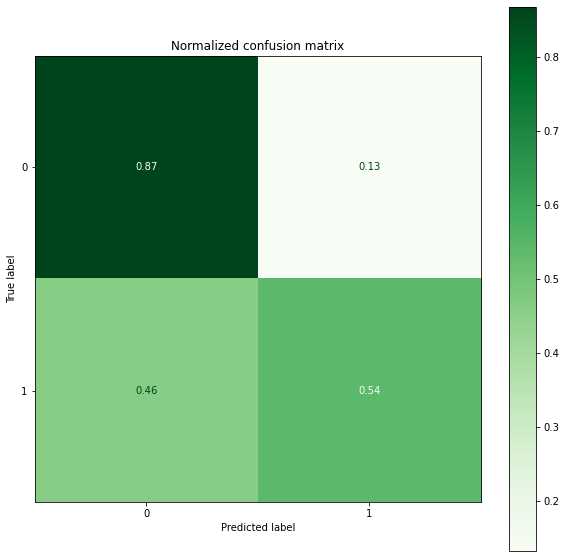

In [26]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    fig, ax = plt.subplots(figsize=(10, 10))
    disp = ConfusionMatrixDisplay.from_predictions(ytest, ypred,
                                 cmap=plt.cm.Greens,
                                 normalize=normalize,
                                 ax = ax)
    ax.set_title(title)